In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

## Data Cleaning

In [2]:
workbook = pd.ExcelFile('Data Challenge Data Set Alumni Association.xlsx')
sheets = workbook.sheet_names

df = pd.concat([pd.read_excel(workbook, sheet_name=s, parse_dates = ['Event Date']).assign(sheet_name=s) for s in sheets])
df.rename(columns = {'sheet_name':'Fiscal Year'}, inplace = True) 

df.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Fiscal Year
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476,AA FY20
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000,AA FY20
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429,AA FY20
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000,AA FY20
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000,AA FY20


In [3]:
#Splitting Group Description into Group Purpose and Group Audience

new = df["Group Description"].str.split("-", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df["Group Purpose"]= new[0] 
  
# making separate last name column from new data frame 
df["Group Audience"]= new[1] 
  
# Dropping old Name columns 
df.drop(columns =["Group Description"], inplace = True)

In [4]:
#Splitting Location Description into Region and Location

new = df["Location Description"].str.split("-", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df["Region"]= new[0] 
  
# making separate last name column from new data frame 
df["Location"]= new[1] 
  
# Dropping old Name columns 
df.drop(columns =["Location Description"], inplace = True)
df.head()

,Event Name,Activity Code,Activity Description,Location Code,Group Code,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Fiscal Year,Group Purpose,Group Audience,Region,Location
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,PS9,2019-07-06,63,52,5,0.079365,12,0.190476,AA FY20,CP Social,General,CP DMV,Eastern Shore
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,PC9,2019-07-10,7,56,1,0.142857,0,0.000000,AA FY20,CP ProDev,General,CP Online,Webinar
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,PC9,2019-07-11,28,45,2,0.071429,2,0.071429,AA FY20,CP ProDev,General,CP Northeast,NNJ
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,PS9,2019-07-11,3,34,0,0.000000,0,0.000000,AA FY20,CP Social,General,CP Northeast,Philadelphia
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,PS9,2019-07-14,22,38,3,0.136364,0,0.000000,AA FY20,CP Social,General,CP Northeast,Philadelphia


In [5]:
#Remove Leading and Trailing Whitespaces from all columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [6]:
#Replace duplicate/incorrect values in Group and Location Columns
df = df.replace({'Region': {'CP Norhteast': 'CP Northeast'},'Location':{'Dallas/Forth Worth':'Dallas/Fort Worth',
                                                                   'DC':'Washington DC','MoCo':'Montgomery County',
                                                                   'Northen VA':'Northern Virginia',
                                                                   'Northern VA':'Northern Virginia',
                                                                   'Prince Georges County':"Prince George's County",
                                                                   'San Francsico':'San Francisco',
                                                                   'Southern MD':'Southern Maryland','Tampa':'Tampa/Sarasota',
                                                                   'Washinton DC':'Washington DC'}, 
           'Group Purpose':{'CP Affiniy':'CP Affinity','CP ProDev':'CP Pro Dev','CP Stewarship':'CP Stewardship',
                            'CP Prodev':'CP Pro Dev'},
            'Group Audience':{'Emiriti':'Emeriti','Genera':'General','StuAlum':'Students & Alumni','Student':'Students'}})

In [7]:
#Checking for Duplicate Location Code Mappings
df_loc = df[['Location Code','Region','Location']].drop_duplicates().sort_values(by=['Location Code'])
df_loc[df_loc['Location Code'].duplicated(keep=False)]

,Location Code,Region,Location
175,PDDC,CP DC,Washington DC
13,PDDC,CP DMV,Washington DC
17,PSMF,CP Southeast,Fort Lauderdale
22,PSMF,CP Southeast,South Florida
15,PWDF,CP West,Dallas/Fort Worth
5,PWDF,CP West Coast,Dallas/Fort Worth
52,PWSD,CP West Coast,San Diego
7,PWSD,CP West,San Diego
21,PWSE,CP West,Seattle
53,PWSE,CP West Coast,Seattle


In [8]:
#Standardizing Location Code Mappings
df.loc[df['Location Code'] == 'PDDC', 'Region'] = "CP DMV"
df.loc[df['Location Code'] == 'PSMF', 'Location'] = "Fort Lauderdale"
df.loc[df['Location'] == 'Dallas/Fort Worth', 'Region'] = "CP Southeast"
df.loc[df['Location Code'] == 'PWSD', 'Region'] = "CP West Coast"
df.loc[df['Location Code'] == 'PWSE', 'Region'] = "CP West Coast"
df.loc[df['Location Code'] == 'PWSF', 'Region'] = "CP West Coast"
df.loc[df['Location Code'] == 'PWSF', 'Location'] = "San Francisco"

In [9]:
#Checking for Duplicate Activity Code Mappings
df_act = df[['Activity Code','Event Name','Activity Description']].drop_duplicates().sort_values(by=['Activity Code'])
df_act[df_act['Activity Code'].duplicated(keep=False)]

,Activity Code,Event Name,Activity Description
18,PEABG,Baltimore Terps Game Watch,CP AA Baltimore Club Game Watch
65,PEABG,Baltimore Terps Game Watch,CP AA-Baltimore Terps Game Watch
98,PEABI,Your Business as a Band: How Can You Get More ...,CP AA-Business & Sales Webinar
8,PEABI,Strategies for Small Biz,CP AA-Business & Sales Webinar
192,PEABI,Why Your Business Value Matters,CP AA-Business & Sales Webinar
...,...,...,...
152,PESTT,Table For Terps,CP SALC-Table for Terps
193,PEZAG,Alumni Awards Gala,CP AAE-Awards Gala
3,PEZAG,Awards Gala,CP AAE-Awards Gala
91,PEZMF,Member FACSTAFF Luncheon,CP AAE-Member FACSTAFF Luncheon


In [10]:
#Standardizing Activity Code Mappings
df.loc[df['Activity Code'] == 'PEABG', 'Activity Description'] = "CP AA-Baltimore Terps Game Watch"
df.loc[df['Activity Code'] == 'PEACI', 'Activity Description'] = "CP AAF Civicus Alumni Event"
df.loc[df['Activity Code'] == 'PEACA', 'Event Name'] = 'DC Terps C-Suite Alumni Meet Up'
df.loc[df['Activity Code'] == 'PEACH', 'Event Name'] = 'Capitol Hill Terps Happy Hour'
df.loc[df['Activity Code'] == 'PEADS', 'Event Name'] = 'DFW Do Good Project at North Texas Food Bank'
df.loc[df['Activity Code'] == 'PEADW', 'Event Name'] = 'Dallas Fort Worth Terps Game Watch'
df.loc[df['Activity Code'] == 'PEAED', 'Event Name'] = 'Seattle Terps Do Good Service Event with Rebuilding Together Seattle'
df.loc[df['Activity Code'] == 'PEAEN', 'Event Name'] = 'ENGR Terps Networking Event at BMI'
df.loc[df['Activity Code'] == 'PEAFA', 'Event Name'] = 'Fall Social in Montgomery County'
df.loc[df['Activity Code'] == 'PEALB', 'Event Name'] = 'Latino Alumni Network Brunch'
df.loc[df['Activity Code'] == 'PEAMC', 'Event Name'] = 'Montgomery City Terps Game Watch'
df.loc[df['Activity Code'] == 'PEAMT', 'Event Name'] = 'Montgomery City Terps TPN'
df.loc[df['Activity Code'] == 'PEANL', 'Event Name'] = 'Meet Maryland Lunch, Naples'
df.loc[df['Activity Code'] == 'PEAOR', 'Event Name'] = 'Meet Maryland Reception, Sarasota'
df.loc[df['Activity Code'] == 'PEAPP', 'Event Name'] = "Prince George's Terps Football Ste"
df.loc[df['Activity Code'] == 'PEASM', 'Event Name'] = 'Southern Maryland Terps Game Watch'
df.loc[df['Activity Code'] == 'PEASP', 'Event Name'] = "Prince George's Terps WBB Suite"
df.loc[df['Activity Code'] == 'PEATF', 'Event Name'] = 'Terp Bound South Florida'
df.loc[df['Activity Code'] == 'PEATI', 'Event Name'] = 'Terp Bound Chicago'
df.loc[df['Activity Code'] == 'PEATL', 'Event Name'] = 'Terp Bound Los Angeles'
df.loc[df['Activity Code'] == 'PEATP', 'Event Name'] = 'Terp Bound Philadelphia'
df.loc[df['Activity Code'] == 'PEATU', 'Event Name'] = 'Terp Bound Southern Connecticut'
df.loc[df['Activity Code'] == 'PEAU1', 'Event Name'] = 'Latino Alumni Network Homecoming Tailgate'
df.loc[df['Activity Code'] == 'PEAWT', 'Event Name'] = "Prince George's Terps Wine Tasting"
df.loc[df['Activity Code'] == 'PEZAG', 'Event Name'] = 'Alumni Awards Gala'
df.loc[df['Activity Code'] == 'PEZMF', 'Event Name'] = 'Faculty/Staff Member Luncheon'

In [11]:
#Checking for Duplicate Activity Code Mappings
df_act = df[['Activity Code','Event Name','Activity Description']].drop_duplicates().sort_values(by=['Activity Code'])
df_act[df_act['Activity Code'].duplicated(keep=False)]

,Activity Code,Event Name,Activity Description
29,PEABI,Is VC Money Right for your Company?,CP AA-Business & Sales Webinar
8,PEABI,Strategies for Small Biz,CP AA-Business & Sales Webinar
174,PEABI,Can Privacy Exist with Machine Learning,CP AA-Business & Sales Webinar
192,PEABI,Why Your Business Value Matters,CP AA-Business & Sales Webinar
98,PEABI,Your Business as a Band: How Can You Get More ...,CP AA-Business & Sales Webinar
172,PEABS,Baltimore Terps at the Baltimore Hunger Project,CP AA-Baltimore Terps Do Good Event
103,PEABS,Wreaths Across America,CP AA-Baltimore Terps Do Good Event
40,PEABS,Baltimore Terps Service Event,CP AA-Baltimore Terps Service Event
19,PEAFL,Extreme Couponing Webinar,CP AA-Financial Literacy Webinar
24,PEAFL,Road to Retirement Webinar,CP AA-Financial Literacy Webinar


In [12]:
#Removing Duplicate Rows
duplicate = df[df.duplicated()] 
len(duplicate.index)

0

In [13]:
#Checking for Nulls
print(df.isnull().sum())

Event Name                         0
Activity Code                      0
Activity Description               0
Location Code                      0
Group Code                         0
Event Date                         0
Participated                       0
Average Age                        0
First Time Attendees               0
Percentage First Time Attendees    0
Major Prospects                    0
Percentage Major Prospect          0
Fiscal Year                        0
Group Purpose                      0
Group Audience                     0
Region                             0
Location                           0
dtype: int64


## Plotting

### Correlation

<AxesSubplot:>

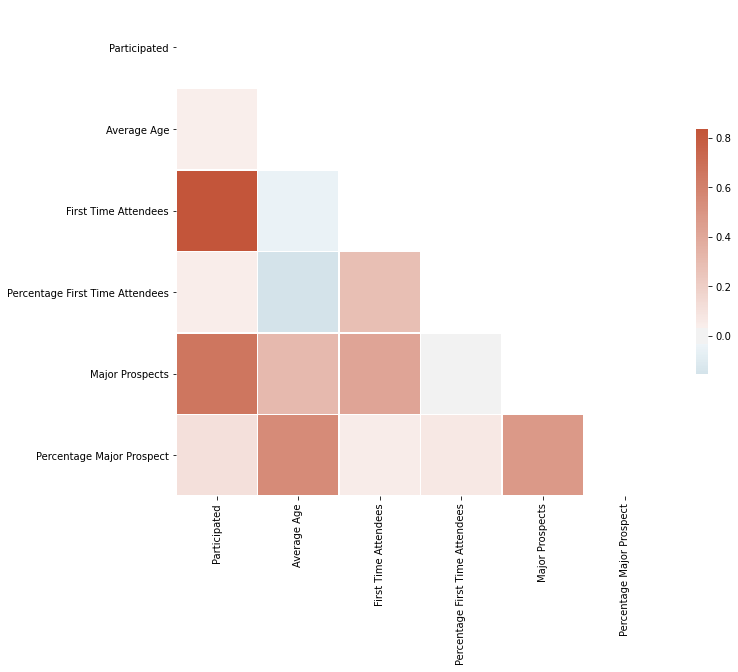

In [14]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Average Age

Text(0.5, 0.98, 'Average Age Distribution')

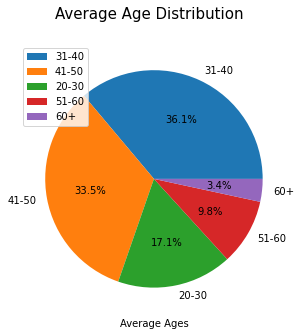

In [15]:
df['bins'] = pd.cut(df['Average Age'], bins=[20,30,40,50,60,100], labels=["20-30","31-40","41-50","51-60","60+"], right=True)

bin_age = pd.DataFrame(df['bins'].value_counts(normalize=True) * 100)
plot = bin_age.plot.pie(y='bins', figsize=(5, 5), autopct='%1.1f%%')
plt.xlabel("Average Ages")
plt.ylabel("")
plt.legend(loc="upper left")
plt.suptitle("Average Age Distribution", fontsize=15)

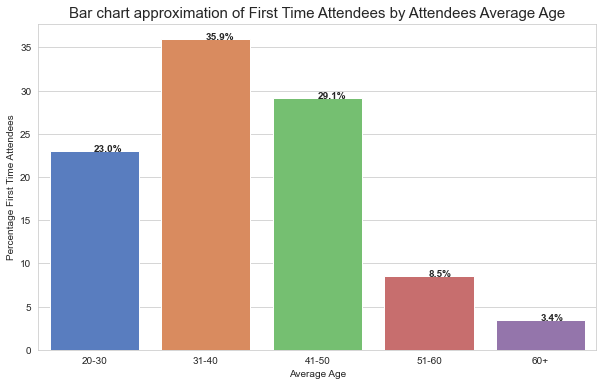

In [16]:
data = df.groupby("bins")["Percentage First Time Attendees"].sum()
data_per = df.groupby('bins').agg(percentage =('Percentage First Time Attendees', lambda p: p.sum() / data.sum() * 100)).round(2)
data_per


sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=data_per.index, y='percentage', data=data_per, ci=None, palette="muted",orient='v', )
ax.set_title("Bar chart approximation of First Time Attendees by Attendees Average Age", fontsize=15)
ax.set_xlabel ("Average Age")
ax.set_ylabel ("Percentage First Time Attendees")
# calculate the percentages
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )

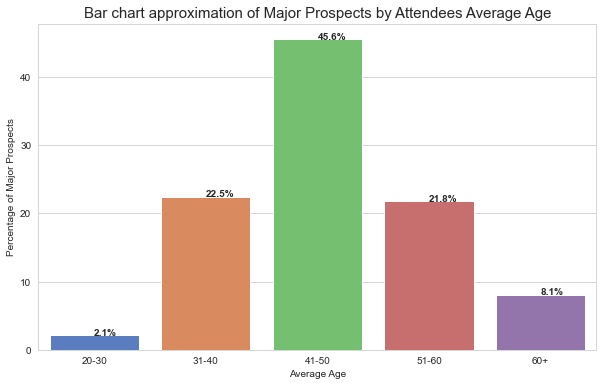

In [17]:
data = df.groupby("bins")["Percentage Major Prospect"].sum()
data_per = df.groupby('bins').agg(percentage =('Percentage Major Prospect', lambda p: p.sum() / data.sum() * 100)).round(2)
data_per


sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=data_per.index, y='percentage', data=data_per, ci=None, palette="muted",orient='v', )
ax.set_title("Bar chart approximation of Major Prospects by Attendees Average Age", fontsize=15)
ax.set_xlabel ("Average Age")
ax.set_ylabel ("Percentage of Major Prospects")
# calculate the percentages
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )

Text(0.5, 1.5, 'Top two events attended within each age group')

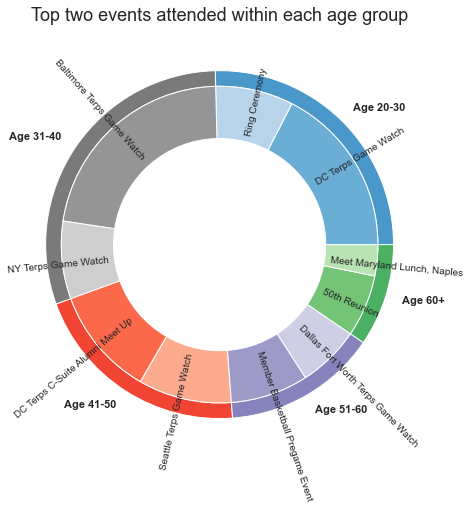

In [18]:
eventpref = pd.concat([df['Event Name'], df['bins']], axis=1)
eventpref = eventpref.set_index(['bins', 'Event Name'])

event2030 = eventpref.loc['20-30'].index.tolist()
event3140 = eventpref.loc['31-40'].index.tolist()
event4150 = eventpref.loc['41-50'].index.tolist()
event5160 = eventpref.loc['51-60'].index.tolist()
event60plus = eventpref.loc['60+'].index.tolist()

from collections import Counter
top2030 = Counter(event2030)
top2030 = top2030.most_common(2)

top3140 = Counter(event3140)
top3140 = top3140.most_common(2)

top4150 = Counter(event4150)
top4150 = top4150.most_common(2)

top5160 = Counter(event5160)
top5160 = top5160.most_common(2)

top60plus = Counter(event60plus)
top60plus = top60plus.most_common(2)

newdf2030 = pd.DataFrame(top2030)
newdf2030.columns = ['Event2030', 'Attended2030']

newdf3140 = pd.DataFrame(top3140)
newdf3140.columns = ['Event3140', 'Attended3140']

newdf4150 = pd.DataFrame(top4150)
newdf4150.columns = ['Event4150', 'Attended4150']

newdf5160 = pd.DataFrame(top5160)
newdf5160.columns = ['Event5160', 'Attended5160']

newdf60plus = pd.DataFrame(top60plus)
newdf60plus.columns = ['Event60plus', 'Attended60plus']

agepref = pd.concat([newdf2030, newdf3140, newdf4150, newdf5160, newdf60plus], axis=1)

# Make data: I have 3 groups and 7 subgroups
group_names=['Age 20-30', 'Age 31-40', 'Age 41-50', 'Age 51-60', 'Age 60+']
group_size=[agepref['Attended2030'].sum(), agepref['Attended3140'].sum(), agepref['Attended4150'].sum(), agepref['Attended5160'].sum(), agepref['Attended60plus'].sum()]
subgroup_names=[agepref.loc[0,'Event2030'], agepref.loc[1,'Event2030'], agepref.loc[0,'Event3140'], agepref.loc[1,'Event3140'], agepref.loc[0,'Event4150'], agepref.loc[1,'Event4150'], agepref.loc[0,'Event5160'], agepref.loc[1,'Event5160'], agepref.loc[0,'Event60plus'], agepref.loc[1,'Event60plus']]
subgroup_size=[agepref.loc[0,'Attended2030'], agepref.loc[1,'Attended2030'], agepref.loc[0,'Attended3140'], agepref.loc[1,'Attended3140'], agepref.loc[0,'Attended4150'], agepref.loc[1,'Attended4150'], agepref.loc[0,'Attended5160'], agepref.loc[1,'Attended5160'], agepref.loc[0,'Attended60plus'], agepref.loc[1,'Attended60plus']]
 
# Create colors
a, b, c, d, e=[plt.cm.Blues, plt.cm.Greys, plt.cm.Reds, plt.cm.Purples, plt.cm.Greens]
  
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.0, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.6), e(0.6)] , textprops={'fontsize': 11, 'weight':'bold'})
plt.setp( mypie, width=0.18, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=2.0-0.18, labels=subgroup_names, rotatelabels = True, labeldistance=0.7, colors=[a(0.5), a(0.3), b(0.5), b(0.3), c(0.5), c(0.3), d(0.5), d(0.3), e(0.5), e(0.3)])
plt.setp( mypie2, width=0.6, edgecolor='white')

plt.title("Top two events attended within each age group", y=1.5, fontsize = 18)

### Location and Region

Text(0.5, 0.98, 'Top 10 locations by participants')

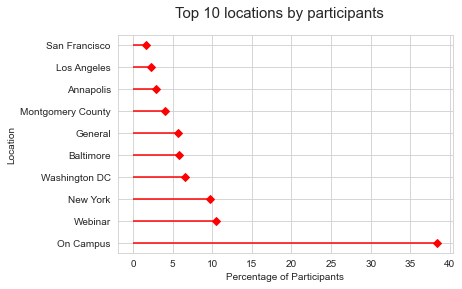

In [19]:
data1 = df.groupby("Location")["Participated"].sum()

data_per_loc = df.groupby('Location').agg(percentage =('Participated', lambda p: p.sum() / data1.sum() * 100)).round(2)
top_locations=data_per_loc.sort_values(by=['percentage'], ascending=False).head(10)
top_locations.reset_index(drop=False, inplace=True)
#print(top_locations)

my_range=range(1,len(top_locations.index)+1)

plt.hlines(y=my_range, xmin=0, xmax=top_locations['percentage'], color='red')
plt.plot(top_locations['percentage'], my_range, "D", color = 'red')
plt.yticks(my_range, top_locations['Location'])
plt.xlabel("Percentage of Participants")
plt.ylabel("Location")
plt.suptitle("Top 10 locations by participants", fontsize=15)

In [20]:
#Location and Region
df_reg2 = df.groupby(['Region']).size().to_frame('count')
df_loc = df.groupby(['Region','Location'])['Percentage First Time Attendees', 'Percentage Major Prospect'].mean()
df_loc2 = df.groupby(['Region','Location']).size().to_frame('count')
df_loc = pd.merge(df_loc,df_loc2, left_index=True, right_index=True).reset_index()
df_reg_loc = pd.merge(df_loc2, df_reg2, left_index=True, right_index=True).reset_index()
df_reg_loc = df_reg_loc.rename(columns={"count_x": "Loc_Count", "count_y": "Reg_Count"})
df_reg_loc["Percentage of Events in Loc"] = df_reg_loc['Loc_Count']/df_reg_loc['Reg_Count']
df_reg_loc = df_reg_loc[['Region','Location','Reg_Count',"Percentage of Events in Loc"]]
df_loc = pd.merge(df_loc,df_reg_loc, left_index=True, right_index=True).reset_index()
df_loc = df_loc.rename(columns = {'Region_x':'Region','Location_x':'Location'})
df_loc = df_loc.drop(['Region_y', 'Location_y','index'], axis=1)
df_loc["FTA_Diff"] = df_loc['Percentage First Time Attendees'] - df_loc['Percentage of Events in Loc']
df_loc["MP_Diff"] = df_loc['Percentage Major Prospect'] - df_loc['Percentage of Events in Loc']
df_loc_FTA_5 = df_loc.sort_values(by=['FTA_Diff'], ascending=False).head(5)
df_loc_FTA_5['Location'] = df_loc_FTA_5[['Region','Location']].agg('-'.join, axis=1)
df_loc_MP_5 = df_loc.sort_values(by=['MP_Diff'], ascending=False).head(5)
df_loc_MP_5['Location'] = df_loc_MP_5[['Region','Location']].agg('-'.join, axis=1)

<ipython-input-20-8a0907becdb3>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_loc = df.groupby(['Region','Location'])['Percentage First Time Attendees', 'Percentage Major Prospect'].mean()


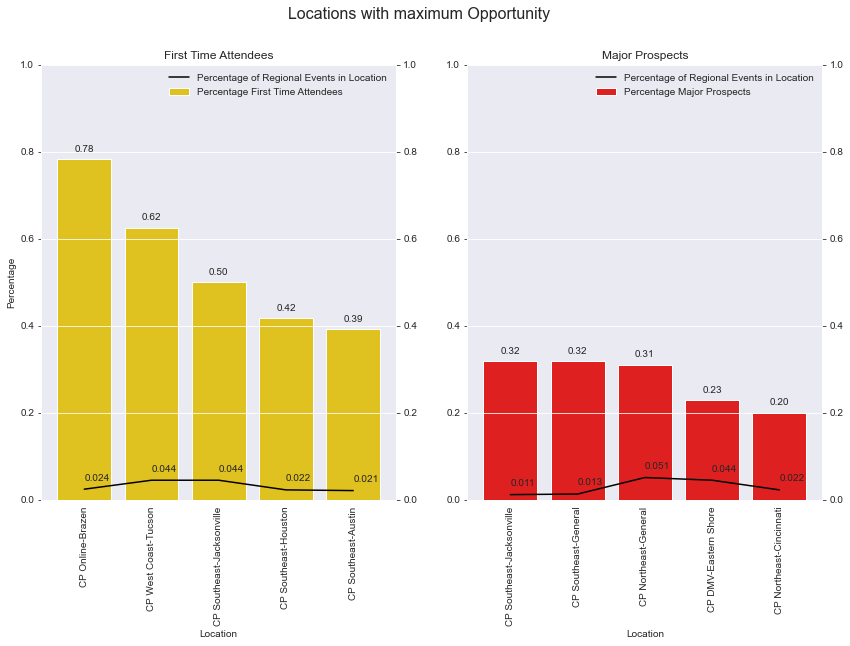

In [21]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1,2,figsize=(14,8))
fig.suptitle('Locations with maximum Opportunity', fontsize=16)

#First Time Attendees
axes[0].set_title("First Time Attendees")
ax1 = sns.barplot(ax=axes[0],x='Location', y='Percentage First Time Attendees', data = df_loc_FTA_5,color='gold',
                  label = 'Percentage First Time Attendees')
ax1.set_ylim(0.0,1.)
ax2 = ax1.twinx()
ax2 = sns.lineplot(ax=axes[0],x='Location', y='Percentage of Events in Loc', data = df_loc_FTA_5, color = 'black',
                  label='Percentage of Regional Events in Location')
ax2.set_ylim(0.0,1.)
axes[0].set_ylabel('Percentage')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].legend(frameon=False)
for p in ax1.patches:
  ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                 xytext = (0, 10), textcoords = 'offset points')

for x, y in zip(df_loc_FTA_5['Location'], df_loc_FTA_5['Percentage of Events in Loc']):
 ax2.text(x = x, # x-coordinate position of data label
 y = y+0.02, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = '{:.3f}'.format(y)) # data label, formatted to ignore decimals

#Major Prospects
axes[1].set_title("Major Prospects")
ax1 = sns.barplot(ax=axes[1],x='Location', y='Percentage Major Prospect', data = df_loc_MP_5,color='red',
                  label='Percentage Major Prospects')
ax1.set_ylim(0.0,1.)
ax2 = ax1.twinx()
ax2 = sns.lineplot(ax=axes[1],x='Location', y='Percentage of Events in Loc', data = df_loc_MP_5, color = 'black',
                  label='Percentage of Regional Events in Location')
ax2.set_ylim(0.0,1.)
axes[1].set_ylabel('')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].legend(frameon=False)
for p in ax1.patches:
  ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                 xytext = (0, 10), textcoords = 'offset points')

for x, y in zip(df_loc_MP_5['Location'], df_loc_MP_5['Percentage of Events in Loc']):
 ax2.text(x = x, # x-coordinate position of data label
 y = y+0.02, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = '{:.3f}'.format(y)) # data label, formatted to ignore decimals

### Group

Text(0.5, 0, 'FTA + MP')

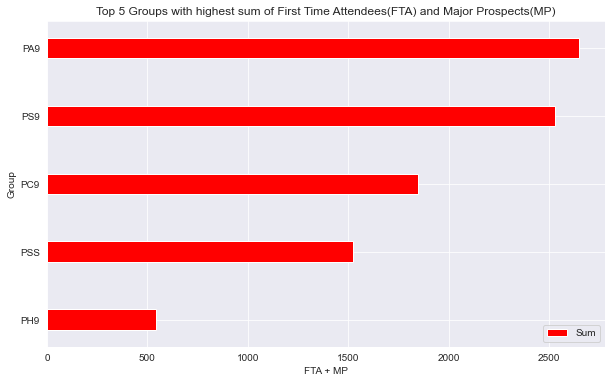

In [22]:
df['Sum']=df['First Time Attendees']+df['Major Prospects']
dfa = df.groupby('Group Code', axis=0, as_index=False).sum()
dfa = dfa.sort_values(by=['Sum'])
dfa = dfa.tail(5)
dfa.plot(x='Group Code', y='Sum',kind='barh', figsize=(10, 6),color = 'red', width = 0.3)
plt.title('Top 5 Groups with highest sum of First Time Attendees(FTA) and Major Prospects(MP)')
plt.ylabel('Group')
plt.xlabel('FTA + MP')

In [23]:
df_grp = df.groupby(['Group Audience','Group Purpose'])['Percentage First Time Attendees', 'Percentage Major Prospect'].mean()
df_grp = df_grp.reset_index()
df_grp_aud = df.groupby(['Group Audience'])['Percentage First Time Attendees', 'Percentage Major Prospect'].mean()
df_grp_aud = df_grp_aud.reset_index()
top5_aud_FTA = list(df_grp_aud.sort_values(by=['Percentage First Time Attendees'], ascending=False).head(10)['Group Audience'].unique())
df_grp_FTA = df_grp[df_grp['Group Audience'].isin(top5_aud_FTA)]
df_grp_FTA = df_grp_FTA.drop(['Percentage Major Prospect'], axis=1)
df_grp_FTA = df_grp_FTA.sort_values('Percentage First Time Attendees',ascending = False).groupby(['Group Audience']).head(1)
df_grp_FTA['Audience-Purpose'] = df_grp_FTA['Group Audience'] + "-" + df_grp_FTA['Group Purpose']
top5_aud_MP = list(df_grp_aud.sort_values(by=['Percentage Major Prospect'], ascending=False).head(10)['Group Audience'].unique())
df_grp_MP = df_grp[df_grp['Group Audience'].isin(top5_aud_MP)]
df_grp_MP = df_grp_MP.drop(['Percentage First Time Attendees'], axis=1)
df_grp_MP = df_grp_MP.sort_values('Percentage Major Prospect',ascending = False).groupby(['Group Audience']).head(1)
df_grp_MP['Audience-Purpose'] = df_grp_MP['Group Audience'] + "-" + df_grp_MP['Group Purpose']

<ipython-input-23-f35411cbdaa3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grp = df.groupby(['Group Audience','Group Purpose'])['Percentage First Time Attendees', 'Percentage Major Prospect'].mean()
<ipython-input-23-f35411cbdaa3>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grp_aud = df.groupby(['Group Audience'])['Percentage First Time Attendees', 'Percentage Major Prospect'].mean()


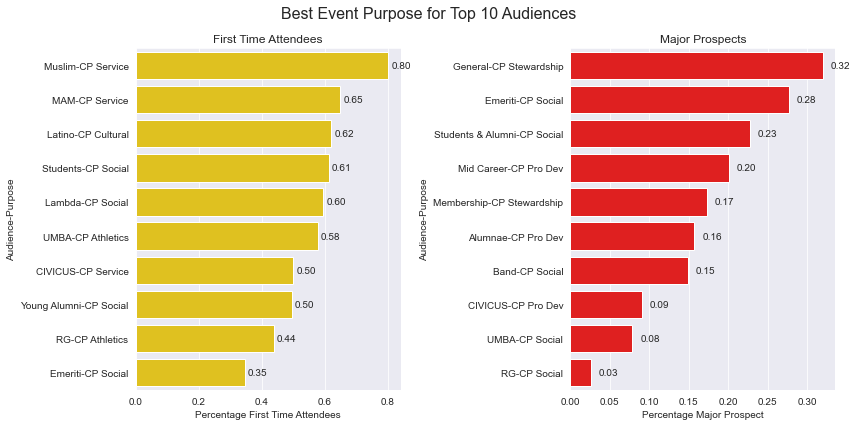

In [24]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Best Event Purpose for Top 10 Audiences', fontsize=16)

#First Time Attendees
axes[0].set_title("First Time Attendees")
ax1 = sns.barplot(ax = axes[0],x='Percentage First Time Attendees', y='Audience-Purpose', data = df_grp_FTA,color='gold')

for p in ax1.patches:
 ax1.text(p.get_width()+0.01,       # set the text at 0.01 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(p.get_width()), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')

#Major Prospects
axes[1].set_title("Major Prospects")
ax2 = sns.barplot(ax = axes[1],x='Percentage Major Prospect', y='Audience-Purpose', data = df_grp_MP,color='red')

for p in ax2.patches:
 ax2.text(p.get_width()+0.01,       # set the text at 0.01 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(p.get_width()), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')

fig.tight_layout()

### Time Period

D:\Software\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 0, 'Fiscal Year')

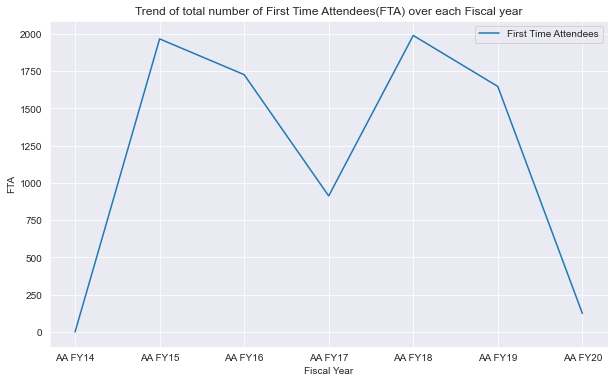

In [25]:
dfb = df.groupby('Fiscal Year', axis=0, as_index=False).sum()
dfb.plot(x='Fiscal Year', y='First Time Attendees',kind='line', figsize=(10, 6))
plt.title('Trend of total number of First Time Attendees(FTA) over each Fiscal year')
plt.ylabel('FTA')
plt.xlabel('Fiscal Year')

D:\Software\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 0, 'Fisal Year')

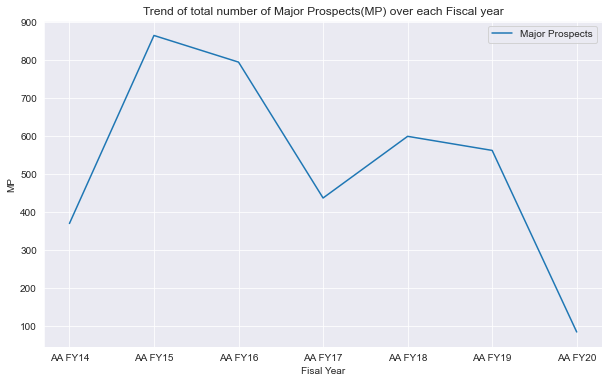

In [26]:
dfb = df.groupby('Fiscal Year', axis=0, as_index=False).sum()
dfb.plot(x='Fiscal Year', y='Major Prospects',kind='line', figsize=(10, 6))
plt.title('Trend of total number of Major Prospects(MP) over each Fiscal year')
plt.ylabel('MP')
plt.xlabel('Fisal Year')

Text(0, 0.5, 'Total Participants')

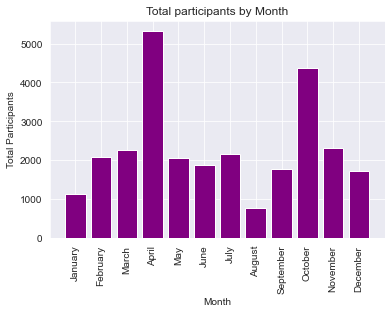

In [27]:
import datetime as dt

frame = df.copy()
frame['Month']= frame['Event Date'].dt.month 

months_data = frame.groupby(["Month"], as_index=False)["Participated"].sum() 
months_data['Month Name'] = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
#print(months_data)

# Create bars and choose color
plt.bar(months_data['Month Name'], months_data['Participated'], color = 'purple')
plt.xticks(months_data['Month Name'], rotation = 90)
# Add title and axis names
plt.title('Total participants by Month')
plt.xlabel('Month')
plt.ylabel('Total Participants')

## Clustering

In [28]:
#Selecting columns to used for clustering
df.reset_index(drop=True, inplace=True)
df_clus = df[['Activity Code','Event Date', 'Participated', 'Average Age','Group Purpose','Group Audience', 
              'Region', 'Location']]
df_clus['Event Date'] = df_clus['Event Date'].dt.strftime('%Y-%m-%d')
df_clus['Act Date'] = df_clus['Activity Code'] + "-" + df_clus['Event Date']
df_clus = df_clus.drop(['Activity Code','Event Date'], axis=1)
df_clus = df_clus.set_index('Act Date')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_clus = df_clus.apply(le.fit_transform)
df_clus.head()

<ipython-input-28-124f618b1784>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clus['Event Date'] = df_clus['Event Date'].dt.strftime('%Y-%m-%d')
<ipython-input-28-124f618b1784>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clus['Act Date'] = df_clus['Activity Code'] + "-" + df_clus['Event Date']


,Participated,Average Age,Group Purpose,Group Audience,Region,Location
Act Date,,,,,,
PEZOC-2019-07-06,60,33,12,6,0,13
PEAPC-2019-07-10,6,37,10,6,3,38
PEANJ-2019-07-11,27,26,10,6,2,22
PEAP1-2019-07-11,2,15,12,6,2,27
PEAP4-2019-07-14,21,19,12,6,2,27


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 729094.61241643
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 66, ncost: 232769.45052816102
Run: 1, iteration: 2/100, moves: 19, ncost: 228659.88766184376
Run: 1, iteration: 3/100, moves: 3, ncost: 228547.37918895457
Run: 1, iteration: 4/100, moves: 0, ncost: 228547.37918895457
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 70, ncost: 147872.42215482504
Run: 1, iteration: 2/100, moves: 18, ncost: 146259.74860040474
Run: 1, iteration: 3/100, moves: 4, ncost: 146077.17727931842
Run: 1, iteration: 4/100, moves: 4, ncost: 146030.8668685351
Run: 1, iteration: 5/100, moves: 0, ncost: 146030.8668685351
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 129, ncost: 137388.000808556

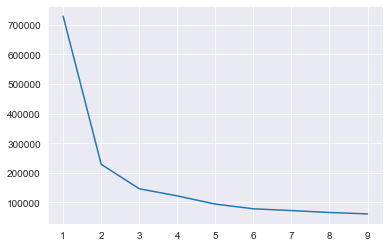

In [29]:
#Using elbow method to identify number of clusters
from kmodes.kprototypes import KPrototypes
cost = []
for num_clusters in list(range(1,10)):
    kmode = KPrototypes(n_clusters=num_clusters, init='Huang', n_init=1, verbose=True)
    kmode.fit_predict(df_clus, categorical=[2,3,4,5])
    cost.append(kmode.cost_)
    
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [48]:
#Clustering data into 6 clusters
kp = KPrototypes(n_clusters=6, init='Huang', n_init=1, verbose=True, random_state=0)
clusters = kp.fit_predict(df_clus, categorical=[2,3,4,5])
clustersDf = pd.DataFrame(clusters)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis = 1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 68, ncost: 87347.79256007171
Run: 1, iteration: 2/100, moves: 43, ncost: 83942.86996260325
Run: 1, iteration: 3/100, moves: 28, ncost: 82926.63820473646
Run: 1, iteration: 4/100, moves: 21, ncost: 81951.80598008525
Run: 1, iteration: 5/100, moves: 22, ncost: 80690.93031242801
Run: 1, iteration: 6/100, moves: 26, ncost: 79957.17593849728
Run: 1, iteration: 7/100, moves: 23, ncost: 78994.46218028075
Run: 1, iteration: 8/100, moves: 14, ncost: 78668.7794502706
Run: 1, iteration: 9/100, moves: 10, ncost: 78359.98812837242
Run: 1, iteration: 10/100, moves: 2, ncost: 78332.53999384359
Run: 1, iteration: 11/100, moves: 4, ncost: 78322.44151195222
Run: 1, iteration: 12/100, moves: 0, ncost: 78322.44151195222


<ipython-input-49-bb378b71af2d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clus_data = combinedDf.groupby(['cluster_predicted'])['Percentage First Time Attendees', 'Percentage Major Prospect'].mean().reset_index()


<AxesSubplot:xlabel='cluster_predicted', ylabel='Percentage First Time Attendees'>

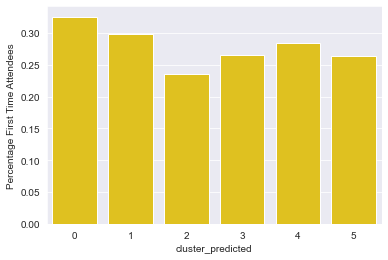

In [49]:
#Plotting Mean Percentage First Time Attendees and Major Prospects by CLuster
clus_data = combinedDf.groupby(['cluster_predicted'])['Percentage First Time Attendees', 'Percentage Major Prospect'].mean().reset_index()
sns.barplot(x='cluster_predicted', y='Percentage First Time Attendees', data = clus_data,color='gold',
                  label = 'Percentage First Time Attendees')

<AxesSubplot:xlabel='cluster_predicted', ylabel='Percentage Major Prospect'>

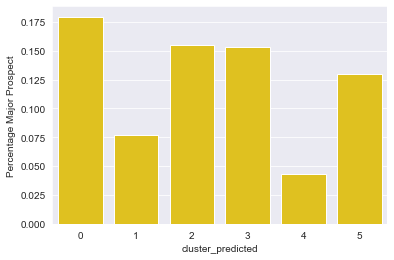

In [50]:
sns.barplot(x='cluster_predicted', y='Percentage Major Prospect', data = clus_data,color='gold',
                  label = 'Percentage Major Prospect')